# Introduction

In this notebook, we aim to understand how to extract  cartesian-coordinate sweeps of PAGASA radar files. We do this by comparing the output of the cartesian-coordinate sweep with the polar-coordinate version, which is readily computed.

## Imports

In [201]:
import pyart
import numpy as np
import matplotlib.pyplot as plt

## Select a file, Open it and extract some information

Examine if we want to zero out data with values less than 20...

In [202]:
the_file = "20190329025002.uf"
radar = pyart.io.read_uf(the_file)
# mask radar values with less than 20 dbz
# radar.fields['corrected_reflectivity']['data'] = np.ma.masked_less(radar.fields['corrected_reflectivity']['data'],20)
# replace the masked values with 0
# radar.fields['corrected_reflectivity']['data'] = radar.fields['corrected_reflectivity']['data'].filled(0)
print(f"Radar has fields: {radar.fields.keys()}")
print(f"Radar has nsweeps: {radar.nsweeps}")
print(f"Radar has scan_type: {radar.scan_type}")

Radar has fields: dict_keys(['corrected_reflectivity', 'velocity'])
Radar has nsweeps: 14
Radar has scan_type: ppi


## Compare defaults/ unspecified sweeps

### Polar

Using the pyart RadarDisplay object we can readily display the files' contents.

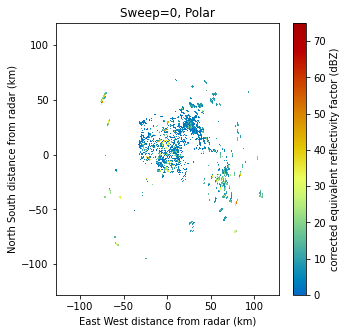

In [203]:
display = pyart.graph.RadarDisplay(radar)
fig, ax = plt.subplots(ncols=1,figsize=(5,5))
display.plot('corrected_reflectivity',edges=True, sweep=0, vmin=0,mask_outside=True,colorbar_flag=True,title="Sweep=0, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian

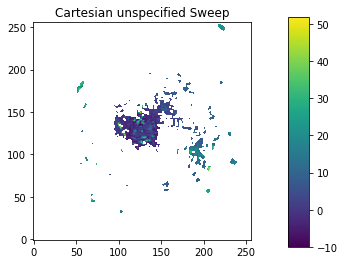

In [204]:
# Note that pyart.map.grid_from_radars takes a radar, but which sweep is used cannot be specified, so we don't know which sweep is used by default.
grid = pyart.map.grid_from_radars(radar,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid = grid
max_grid.fields['corrected_reflectivity']['data'] = grid.fields['corrected_reflectivity']['data']
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("Cartesian unspecified Sweep")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 1

### Polar

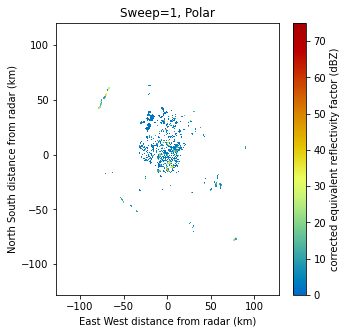

In [205]:
fig, ax = plt.subplots(ncols=1,figsize=(5,5))
display.plot('corrected_reflectivity',edges=True,sweep=1,vmin=0,mask_outside=True,colorbar_flag=True,title="Sweep=1, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian

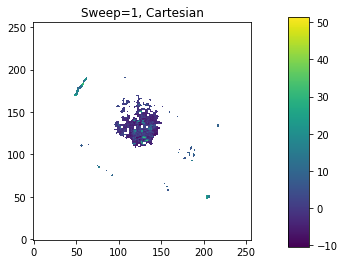

In [207]:
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([1]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([1]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower',)
plt.title("Sweep=1, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maximum

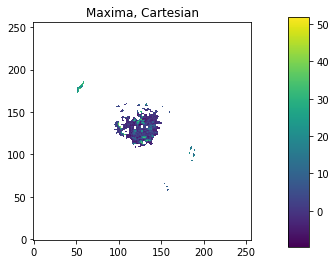

In [208]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 2

### Polar

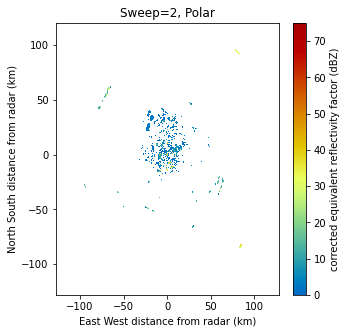

In [209]:
fig, ax = plt.subplots(ncols=1,figsize=(5,5))
display.plot('corrected_reflectivity',edges=True,sweep=2,vmin=0,mask_outside=True,colorbar_flag=True,title="Sweep=2, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian

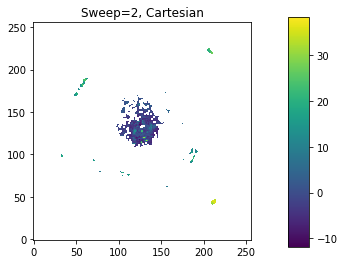

In [210]:
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([2]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([2]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("Sweep=2, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

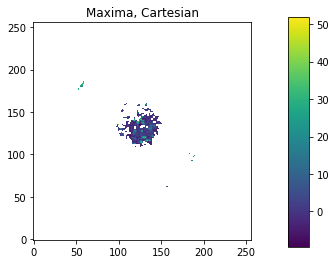

In [211]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 3

### Polar

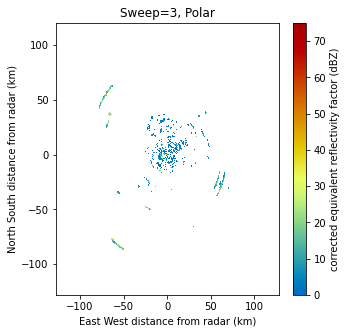

In [212]:
fig, ax = plt.subplots(ncols=1,figsize=(5,5))
display.plot('corrected_reflectivity',edges=True,sweep=3,vmin=0,mask_outside=True,colorbar_flag=True,title="Sweep=3, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian, Sweep=3


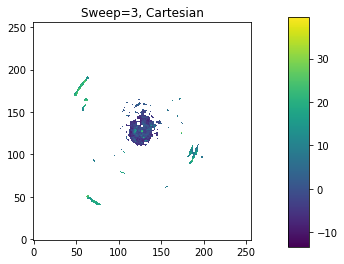

In [213]:
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([3]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([3]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("Sweep=3, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

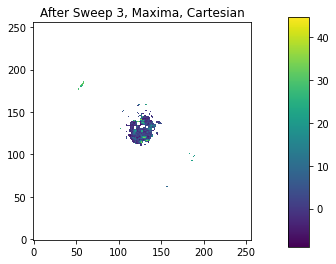

In [214]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 3, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 4

### Sweep 4, Polar

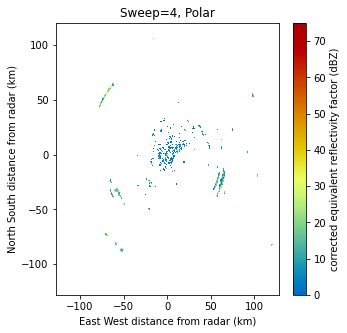

In [215]:
sweep = 4
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Sweep 4, Cartesian

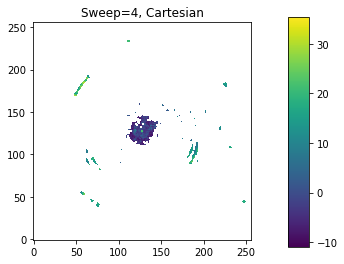

In [216]:
sweep_num=4
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

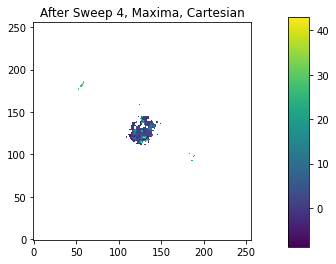

In [217]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 4, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 5

### Polar, Sweep=5


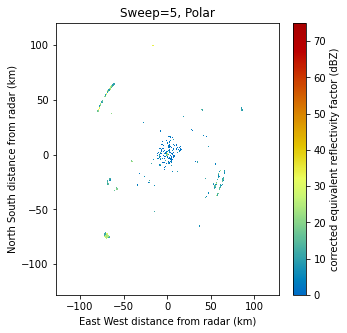

In [218]:
sweep = 5
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian Sweep=5

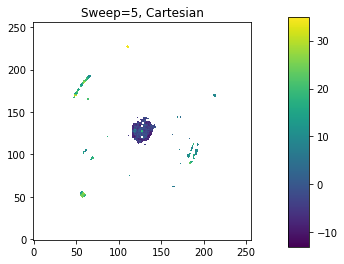

In [219]:
sweep_num=5
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

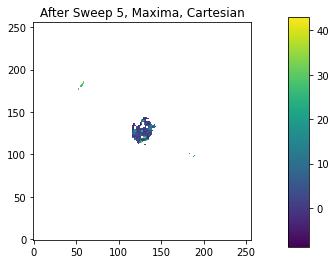

In [220]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 5, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 6

### Polar Sweep=6

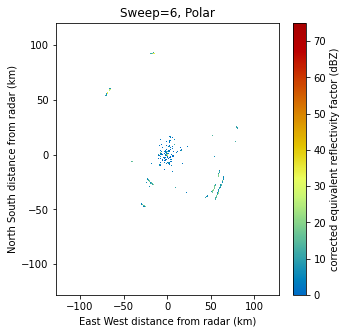

In [221]:
sweep = 6
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

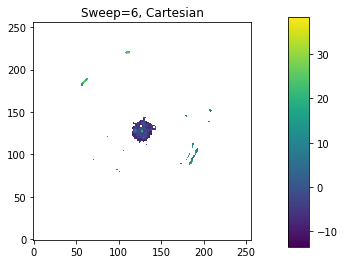

In [222]:
sweep_num=6
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

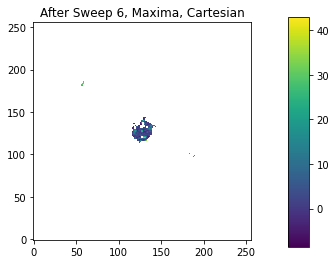

In [223]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 6, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 7

## Polar Sweep 7

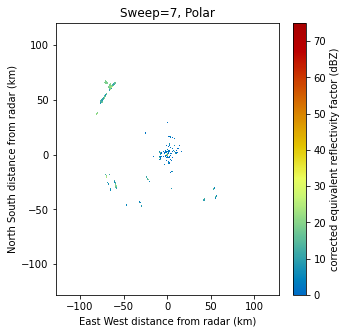

In [224]:
sweep = 7
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian Sweep 7

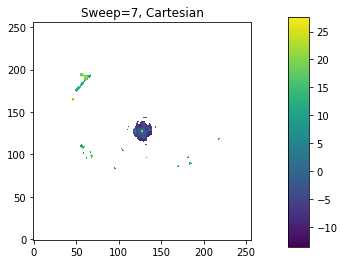

In [225]:
sweep_num=7
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

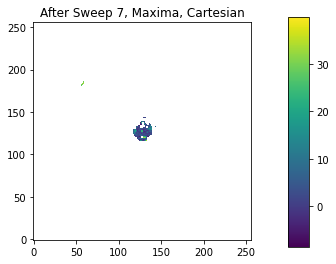

In [226]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 7, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 8

### Polar Sweep 8

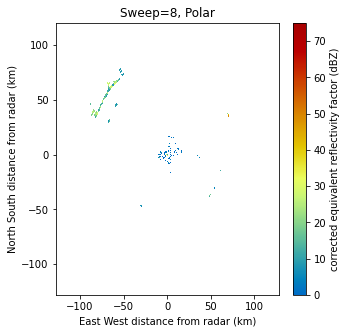

In [227]:
sweep = 8
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian Sweep=8

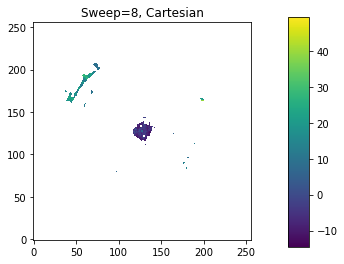

In [228]:
sweep_num=8
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])

_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

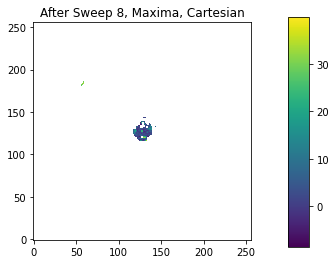

In [183]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 8, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 9

### Polar, Sweep=9

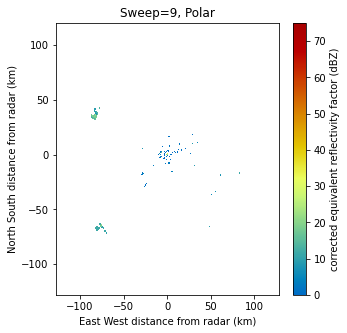

In [229]:
sweep = 9
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian, Sweep=9

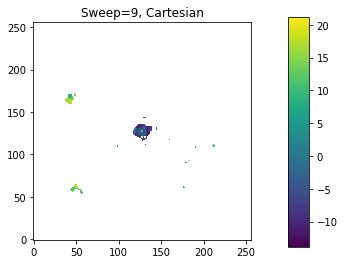

In [230]:
sweep_num=9
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

In [186]:
### Maxima

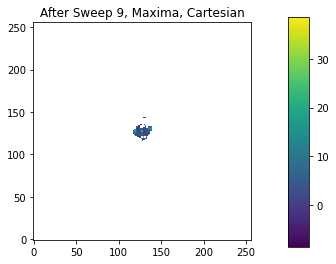

In [231]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 9, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 10

### Polar Sweep 10

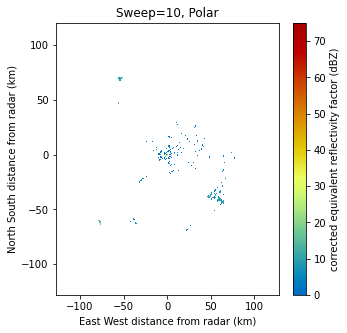

In [232]:
sweep = 10
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian Sweep 10

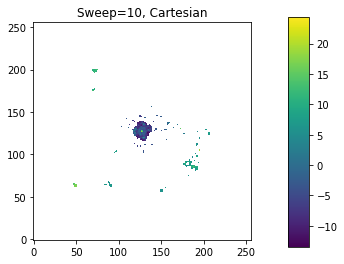

In [233]:
sweep_num=10
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

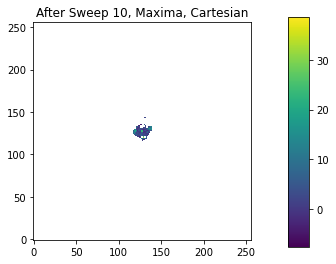

In [234]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 10, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 11

### Polar Sweep 11

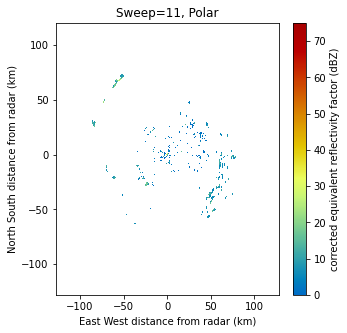

In [235]:
sweep = 11
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian Sweep 11

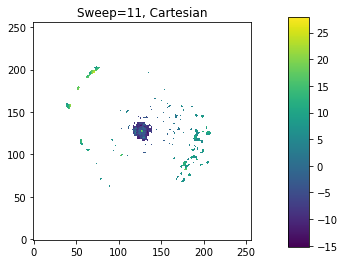

In [236]:
sweep_num=11
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

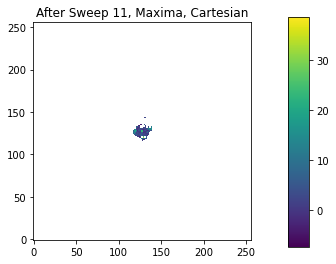

In [237]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 11, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 12

### Polar Sweep 12

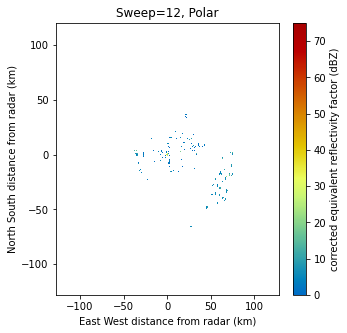

In [238]:
sweep = 12
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian Sweep 12

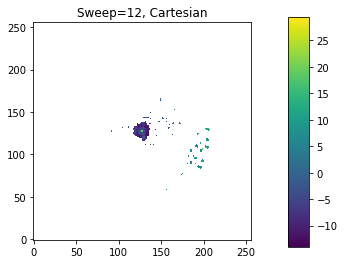

In [239]:
sweep_num=12
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

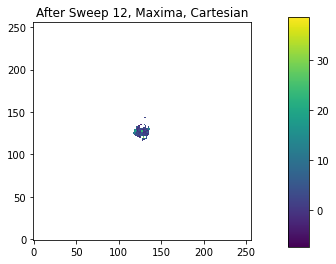

In [240]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 12, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

## Sweep 13

### Polar Sweep 13

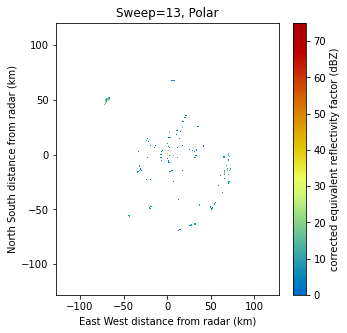

In [241]:
sweep = 13
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
display.plot('corrected_reflectivity', edges=True, sweep=sweep, vmin=0, mask_outside=True, colorbar_flag=True, title=f"Sweep={sweep}, Polar")
# zoom in from x=[-250,250] and y=[-250,250] to x=[-128, 128], y=[-128,128]
display.set_limits(xlim=(-128, 128), ylim=(-128, 120))

### Cartesian Sweep 13


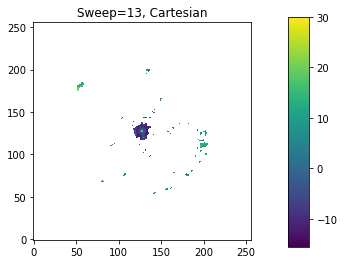

In [242]:
sweep_num=13
sweep = radar.extract_sweeps([0])
sweep_data = radar.extract_sweeps([sweep_num]).fields['corrected_reflectivity']['data']
sweep_azi = radar.extract_sweeps([sweep_num]).azimuth['data']
sweep.fields['corrected_reflectivity']['data'] = sweep_data
sweep.azimuth['data'] = sweep_azi

grid = pyart.map.grid_from_radars(sweep,grid_shape=(1,256,256),grid_limits=((0,2000),(-128000,128000),(-128000,128000)),fields=['corrected_reflectivity'])
max_grid.fields['corrected_reflectivity']['data'] = np.maximum(grid.fields['corrected_reflectivity']['data'], max_grid.fields['corrected_reflectivity']['data'])
_, ax = plt.subplots()
im = ax.imshow(grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title(f"Sweep={sweep_num}, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### Maxima

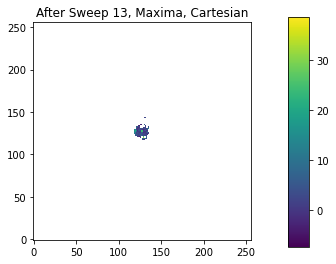

In [243]:
fig, ax = plt.subplots()
im = ax.imshow(max_grid.fields['corrected_reflectivity']['data'][0],origin='lower')
plt.title("After Sweep 13, Maxima, Cartesian")
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()